# FoodHub Data Analysis

## Importing the Necessary Libraries

In [1]:
# Libararies for Data Manipulation
import numpy as np
import pandas as pd

#Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding the Structure of the Data

In [2]:
#Reading the data
df = pd.read_csv('foodhub_order.csv')
#Returning the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [3]:
#Checking the shape of the data
df.shape

(1898, 9)

### Observations:

In this dataset, there are 1898 rows and 9 columns

In [4]:
#Checking the datatypes of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Observations:

-In this dataset, there are about 4 datatypes that are integers (order_id, customer_id, food_preparation_time, and delivery_time), 4 datatypes that are objects (resturant_name, cuisine_type, day_of_the_week, and rating), and there is only 1 datatype that is a float (cost_of_the_order)

-With this being said, all of the variables have the same non-null count, in which proves that there aren't any missing variables to be accounted for. Ratings seem like it has been accounted for all the null variables with Not given.

In [5]:
#Confirming if there are any missing variables 
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Based on this information, we can proceed with the statistical summary since there are no missing variables that need to be accounted for.

In [6]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [7]:
#We will also change the customer_id dataset 
#to a categorical one since this dataset is categorical by nature although it possesses numerical qualities 
df['customer_id'] = df['customer_id'].astype(object)

In [8]:
df['customer_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1898 entries, 0 to 1897
Series name: customer_id
Non-Null Count  Dtype 
--------------  ----- 
1898 non-null   object
dtypes: object(1)
memory usage: 15.0+ KB


In [9]:
df['order_id']=df['order_id'].astype(object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 133.6+ KB


In [11]:
#Performing a statistical summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,1898.0,1477147.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,1898.0,1200.0,52832.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


### Observations:

-The minumum time is takes to prepare food is 20 minutes, the average time is around 27 minutes, and the maximum time it takes to prepare food is 35 minutes once an order is placed. Since the median is 27 and the average is 27, we can make the assumption that is an equal distribution.

-The average cost for an order is going to be around $16.50, while the median is 4.5, which indicates a right skewed distribution

-Delivery time average is around 24 minutes, while the mimumum and maximum time it takes to deliver is 15 minutes and 33 minutes. This may also be an equal distribution

In [12]:
#How many orders are not rated?
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

### Observations:

There are about 736 orders that have not been given a rating

# Exploratory Data Analysis 

## Univariate Analysis

In [16]:
#Unique count for order id
df['order_id'].nunique()

1898

In [17]:
#Unique count for customer id 
df['customer_id'].nunique()

1200

In [18]:
#Unique count for restaurant names
df['restaurant_name'].nunique()

178

In [19]:
#Unique count for cuisine type variable
df['cuisine_type'].nunique()

14

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

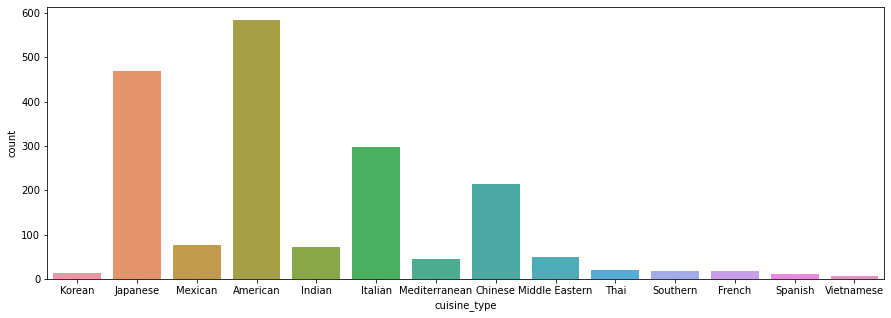

In [22]:
#Observations for cuisine type 
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='cuisine_type')

### Observations:

-American food gets the highest order count, then Japanese food, Chinese, and Italian come in the next 3 that have the highest order count 

-This may indicate a high preference among American food from college students

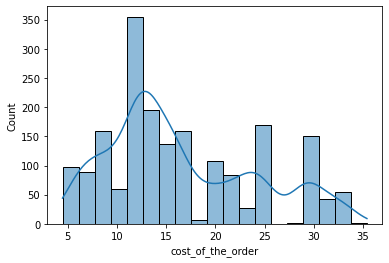

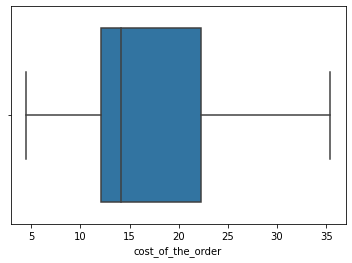

In [13]:
#Observations for order costs
sns.histplot(data=df,x='cost_of_the_order',kde=True)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

### Observations:

-The cost of the order variable is skewed to the right, in which may show that most of the orders may be on the cheaper side rather than the expensive, with no outliers

-Shows that the 75% of the order costs are over $15 and 25 percent of them fall below $15

In [23]:
#Unique count for day of the week variable
df['day_of_the_week'].nunique()

2

<AxesSubplot:xlabel='day_of_the_week', ylabel='count'>

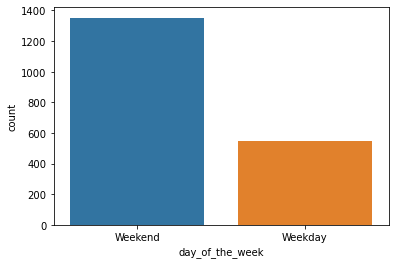

In [24]:
#Observations for the day of the week variable 
sns.countplot(data=df,x='day_of_the_week')

### Observations:

Most of the orders come on the weekends than on the weekday

In [25]:
#Unique count for the rating variable
df['rating'].nunique()

4

<AxesSubplot:xlabel='rating', ylabel='count'>

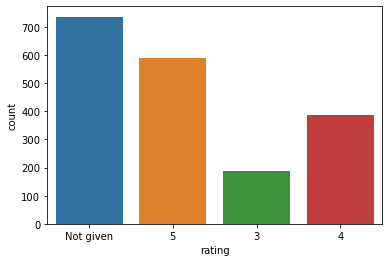

In [26]:
#Observations for the rating variable
sns.countplot(data=df,x='rating')

### Observations:

Most orders are not given a rating or are given a 5, or a 4. This shows that the customer may be more pleased with the service rather than not, since not giving a rating implies their lack of caring

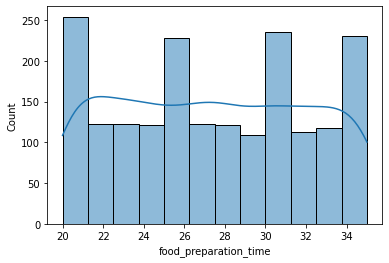

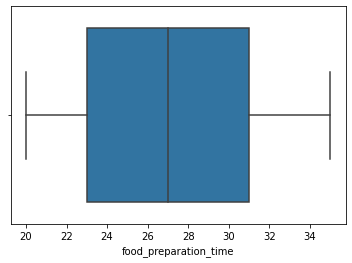

In [14]:
#Food preparation time
sns.histplot(data=df,x='food_preparation_time',kde=True)
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

### Observations:

-The food preparation time is approximately normal with no outliers 

-We can see that the median food preparation is around 27 minutes 

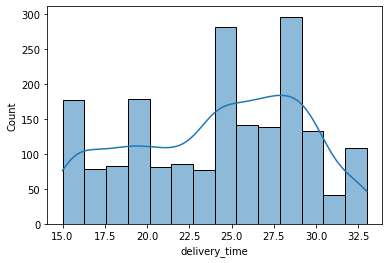

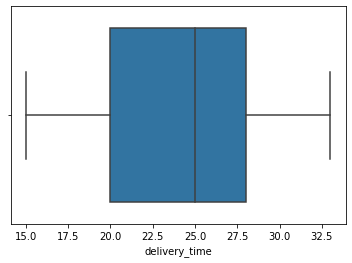

In [15]:
#Observations for delivery time
sns.histplot(data=df,x='delivery_time',kde=True)
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

### Observations:

-The delivery time graph is approximately normal, in which indicates that most delivery times are longer, and this graph has no outliers

-25% of the delivery times fall over 25 minutes, while 75% of the delivery times fall under 25 minutes

In [28]:
#Top 5 restaurants in terms of orders received 
df['restaurant_name'].value_counts(ascending=False).head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [31]:
#Most popular cuisine on weekends
df_weekend = df[df['day_of_the_week']=='Weekend']
df_weekend['cuisine_type'].value_counts(ascending=False).head(1)

American    415
Name: cuisine_type, dtype: int64

In [40]:
#Percentage of the orders that cost more than $20
Percentage = (df[df['cost_of_the_order']>20].shape[0]/df.shape[0])*100
print('Percentage of orders over $20:',round(Percentage,2),'%')

Percentage of orders over $20: 29.24 %


In [41]:
#Mean order delivery time
Mean_Time = df['delivery_time'].mean()
print('The mean delivery time of this dataset is:',round(Mean_Time,2),'minutes')

The mean delivery time of this dataset is: 24.16 minutes


In [42]:
#Customers eligable for a 20% voucher
df['customer_id'].value_counts(ascending=False).head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

## Multivariate Analysis

<AxesSubplot:xlabel='cost_of_the_order', ylabel='cuisine_type'>

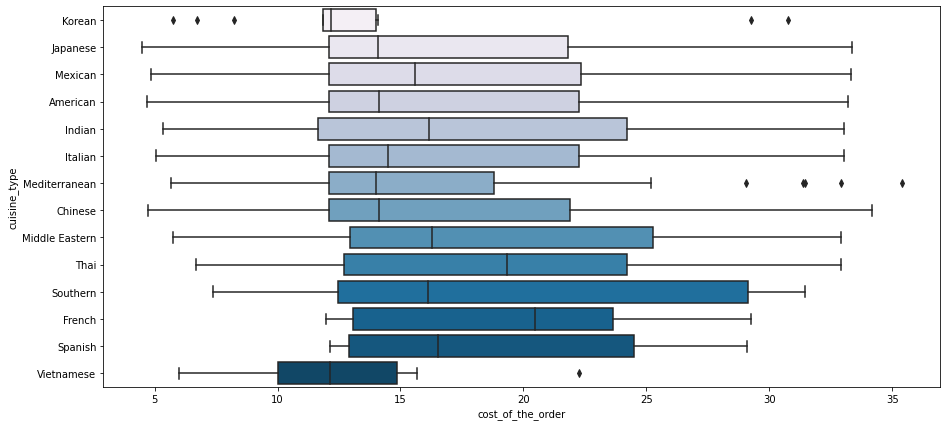

In [46]:
#Relationship between cuisine types and cost or the order 
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type',palette='PuBu')

### Observations:

-Among the top cuisines based on order counts, American Food, Italian Food, and Japanese food have around the same median price between 14 to 15 dollars

-Vietnamese Food has the smallest variability among the cuisines since its range is must smaller 

-There are only outliers among the Vietnamese, Korean, and Mediterranean cuisines

<AxesSubplot:xlabel='food_preparation_time', ylabel='cuisine_type'>

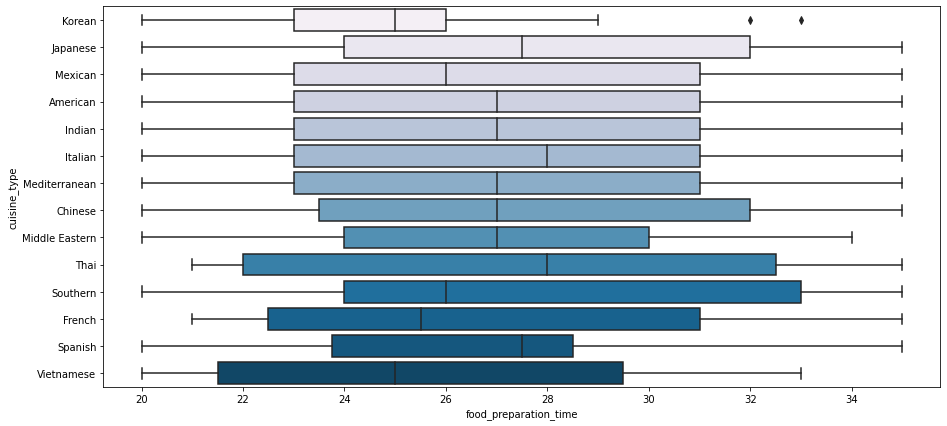

In [53]:
#Relationship between cuisine type and food preparation time 
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='food_preparation_time',y='cuisine_type',palette='PuBu')

### Observations:

-The food preparation time falls between 20-35 minute interval

-If we look at the restuarants with the higher order counts, they all have a median food preparation time that is between 27 and 28 minutes. It also has a high variability due to the range of the preparation time being significantly high

-Other restaurants have a significantly lower median food preparation time

<AxesSubplot:xlabel='delivery_time', ylabel='day_of_the_week'>

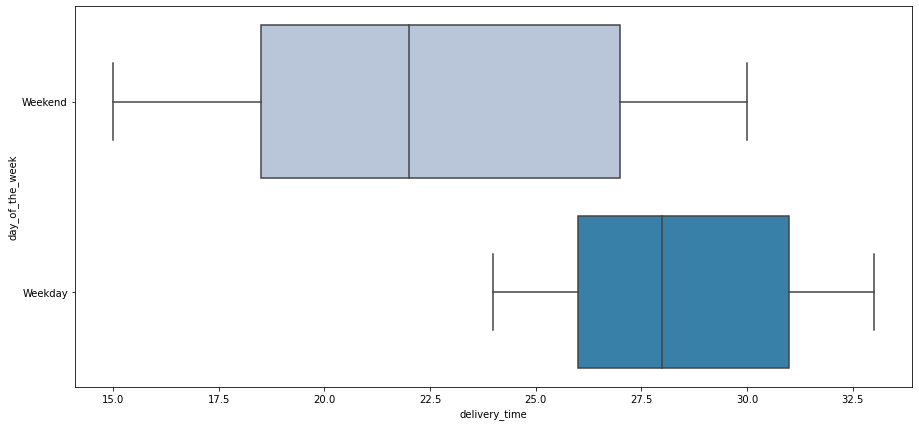

In [62]:
#Relationship between the day of the week and delivery time 
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='delivery_time',y='day_of_the_week',palette='PuBu')

### Observations:

The delivery time on weekdays ranges higher than on the weekends, since rush hour may have an affect on this variable 

In [59]:
#Revenues generated by restaurants 
df.groupby(['restaurant_name','cuisine_type'])[['cost_of_the_order']].sum().sort_values(by='cost_of_the_order',ascending=False).head(14)

,,cost_of_the_order
restaurant_name,cuisine_type,
Shake Shack,American,3579.53
Blue Ribbon Sushi,Japanese,1903.95
The Meatball Shop,Italian,1821.01
Blue Ribbon Fried Chicken,American,1662.29
Parm,Italian,1112.76
RedFarm Broadway,Chinese,965.13
RedFarm Hudson,Chinese,921.21
TAO,Japanese,834.50
Han Dynasty,Chinese,755.29


### Observations:

-The restaurants that generated the most revenue are from the higher order counts, which are American restaurants, Japanese, Italian, and Chinese Restaurants

-The top restaurants is Shake Shack, in which makes the most revenue out of all the restaurants, then we habe Blue Ribbon Sushi and The Meatball Shop

<AxesSubplot:xlabel='rating', ylabel='delivery_time'>

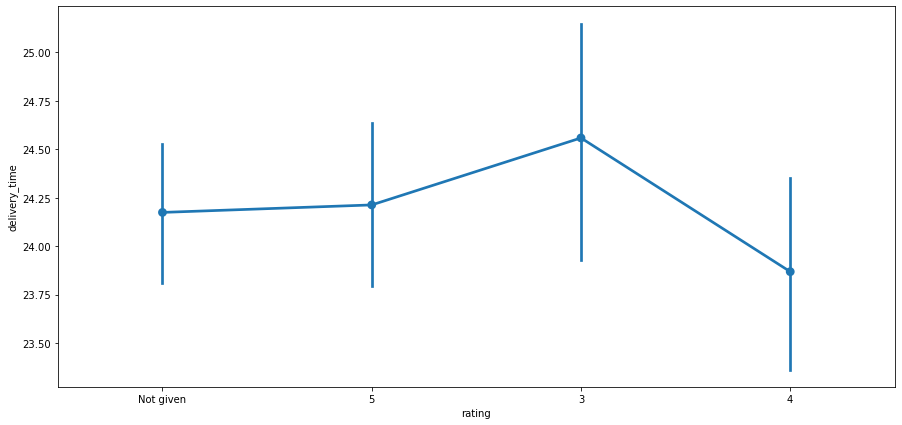

In [71]:
#Relationship between rating and delivery time 
plt.figure(figsize=(15,7))
sns.pointplot(data=df,x='rating',y='delivery_time')

### Observations:

-You see that a higher time, you see that you will get the lowest rating of a 3, while you see that the shorter the delivery time, you will end up with a 4 and 5, as well as Not Given a rating is also for lower delivery times 

<AxesSubplot:xlabel='rating', ylabel='food_preparation_time'>

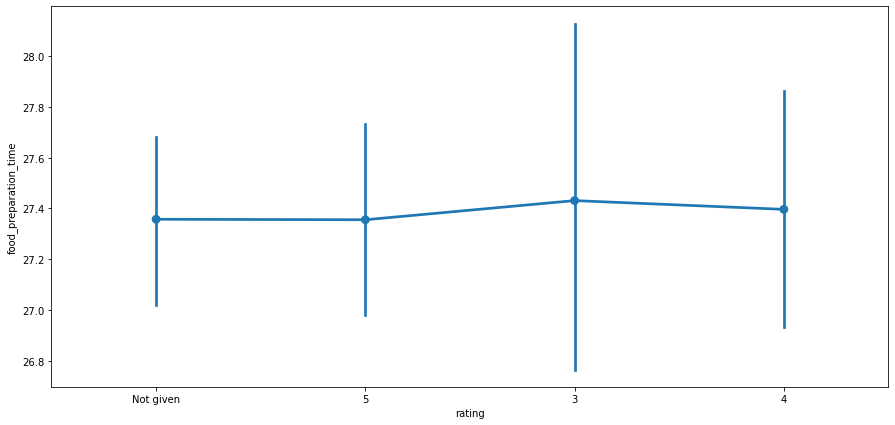

In [72]:
#Relationship between food preparation time and ratings
plt.figure(figsize=(15,7))
sns.pointplot(data=df,x='rating',y='food_preparation_time')

### Observations:

-Food preparation time does not vary based upin rating. It stayed relatively the same

<AxesSubplot:xlabel='rating', ylabel='cost_of_the_order'>

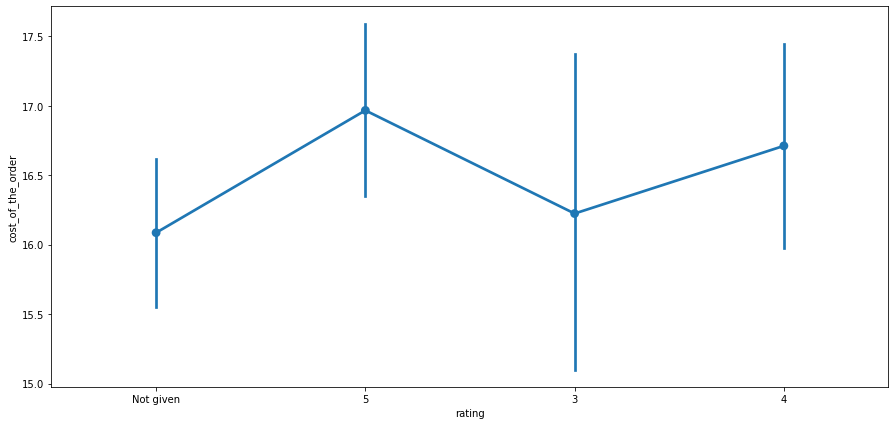

In [73]:
plt.figure(figsize=(15,7))
sns.pointplot(data=df,x='rating',y='cost_of_the_order')

### Observations:

-The higher the cost of the food, the higher the rating. You see that a 4 or 5 rating usually ends up with a higher cost of the order, and a rating Not Given and a 3 rating given when the cost of the order is lower

<AxesSubplot:>

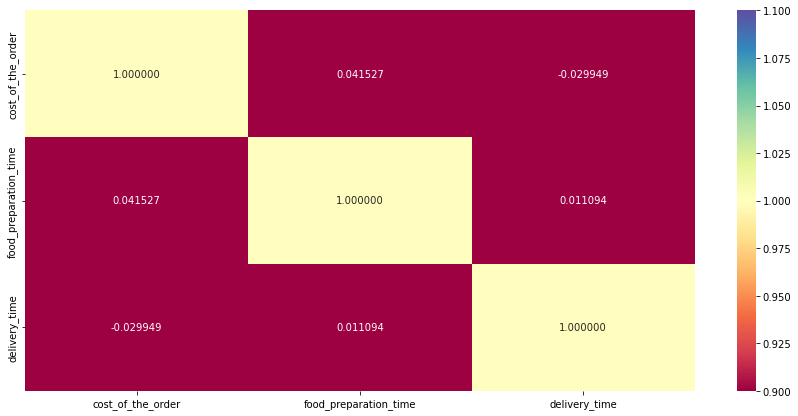

In [68]:
#Correlation Among Numerical Variables
Numerical_List=['cost_of_the_order','food_preparation_time','delivery_time']
plt.figure(figsize=(15,7))
sns.heatmap(df[Numerical_List].corr(), annot=True, vmin=1, vmax=1, fmt='2f',cmap='Spectral')

### Observations:

-None of the numerical variables have any correlation among another

In [97]:
#Checking which restaurants are eligable for promotional offer based on rating count 
df_rating=df[df['rating']!='Not given'].copy()
df_rating['rating']=df_rating['rating'].astype('int')

df_highest_rating = df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
print(df_highest_rating.head(20))

                  restaurant_name  rating
0                     Shake Shack     219
1               The Meatball Shop     132
2               Blue Ribbon Sushi     119
3       Blue Ribbon Fried Chicken      96
4                            Parm      68
5                RedFarm Broadway      59
6                  RedFarm Hudson      55
7                             TAO      49
8                     Han Dynasty      46
9   Blue Ribbon Sushi Bar & Grill      44
10                 Nobu Next Door      42
11                       Rubirosa      37
12               Sushi of Gari 46      37
13                         Momoya      30
14      Blue Ribbon Sushi Izakaya      29
15    Five Guys Burgers and Fries      29
16                     Bareburger      27
17               Tamarind TriBeCa      27
18              Jack's Wife Freda      25
19          Sushi of Gari Tribeca      24


In [102]:
#Checking which restaurant meet the criteria for promotional offer based on average rating count of more than 50
rest_names = df_highest_rating[df_highest_rating['rating']>50]['restaurant_name']
print(rest_names)

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
4                         Parm
5             RedFarm Broadway
6               RedFarm Hudson
Name: restaurant_name, dtype: object


In [111]:
#Checking which restaurant has the highest average mean greater than 4 
df_mean_4 = df_mean_4 = df_rating[df_rating['restaurant_name'].isin(rest_names)].copy()

In [112]:
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,RedFarm Broadway,4.243902
4,Blue Ribbon Sushi,4.219178
5,RedFarm Hudson,4.176471
6,Parm,4.128205


In [124]:
#Checking which restaurants have the criteria for 25% charge and 15% charge 
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        x*0
df['revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head(20)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,6.3050,44
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,0.9105,49
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.8955,63
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26,2.4660,47
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26,1.0770,55


In [117]:
#Getting total revenue and printing it 
total_rev = df['revenue'].sum()
print('the total revenue generated by the company is:',round(total_rev, 2),'dollars')

the total revenue generated by the company is: 6166.3 dollars


In [119]:
#Percentage of orders that take 60 minutes to deliver
df['total_time'] = df['delivery_time'] + df['food_preparation_time']
Percent_Time = (df[df['total_time']>60].shape[0]/df.shape[0])*100
print(round(Percent_Time,2),'percent of deliveries take 60 minutes in total to deliver')

10.54 percent of deliveries take 60 minutes in total to deliver


In [123]:
#Analyzing mean times between weekdays and weekends 
print('the mean delivery time on weekdays is around',round(df[df['day_of_the_week']=='Weekday']['delivery_time'].mean(),
        2), 'minutes')
print('the mean delivery time on weekends is around',round(df[df['day_of_the_week']=='Weekend']['delivery_time'].mean(),
        2), 'minutes')

the mean delivery time on weekdays is around 28.34 minutes
the mean delivery time on weekends is around 22.47 minutes


## Recommendations and Conclusions

### Conclusions

-It takes less time on the weekends than on the weekdays to deliver food. This may be because of time constraints due to rush hour on weekdays in both the mornings and the afternoons. 

-FoodHub generated 6166.3 dollars in revenue from charging cost of orders over $20 25% and over 5 dollars 15%

-Majority of their revenue may come from the top 5 restaurants such as Shake Shack, The MeatBall Shop, and Blue Ribbon Sushi, which are mainly American Food restaurants, and these are among the top restaurants with the highest ratings and rating count

### Recommendations

-Focus on mainly high demanded restaurants for revenue generation such as restaurants pertaining to ones that have American, Japanese, and Itailian Cuisines, since these are the restaurants that end up getting the highest rating and the highest cost of orders among the different cuisines. 

-In an effort to gain feedback for business improvement, we should encourage more customers to leave feeback ratings when they are pleased with our services in order to increase the service loyatly of our business